# Esercitazione 9 

Mostro come abbia disposto le città su una circonferenza o dentro a un quadrato

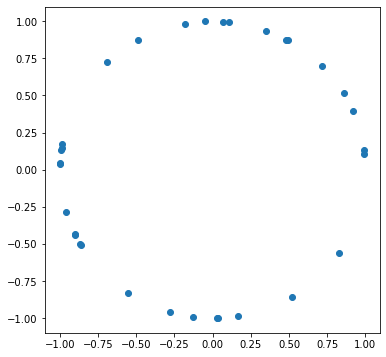

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x,y = np.loadtxt("es9/circ.out", usecols=(0,1), delimiter=',', unpack='true')

plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.show()

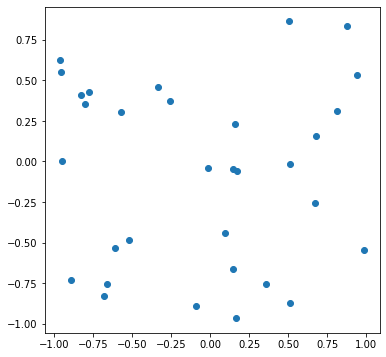

In [3]:
x,y = np.loadtxt("es9/sqre.out", usecols=(0,1), delimiter=',', unpack='true')

plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.show()

Per la funzione di selezione, identifico la seguente:

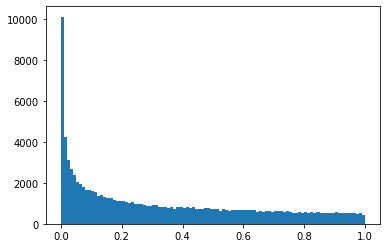

In [10]:
n = 100000
distr = np.random.rand(n)**(2)

plt.hist(distr, bins = 100)
plt.show()

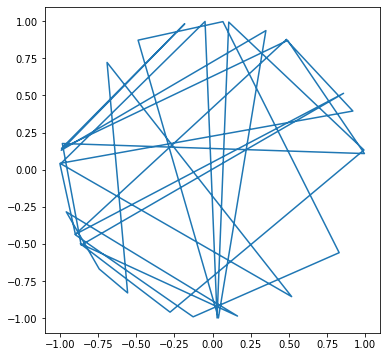

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x,y = np.loadtxt("es9/final.out", usecols=(0,1), delimiter=',', unpack='true')

plt.figure(figsize=(6,6))
plt.plot(x,y)
plt.show()

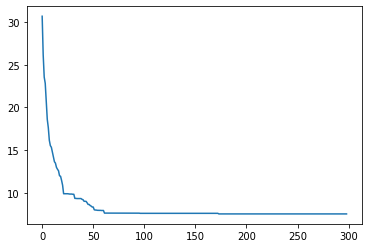

In [14]:
fit = np.loadtxt("es9/fitness.out", usecols=(0), delimiter=',', unpack='true')

plt.plot(fit)
plt.show()